In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV
#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv('Advertising.csv')
df.head(20)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [57]:
#drop unnecessary columns
df=df.drop(["Unnamed: 0"],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


dataframe has 5 column

1.label/target is sales

2.features are TV,radio and newspaper	

3.All are continous/numeric data

# EDA

In [59]:
#Checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values present in the dataframe

In [60]:
#removing duplicate values
df.drop_duplicates(inplace=True)

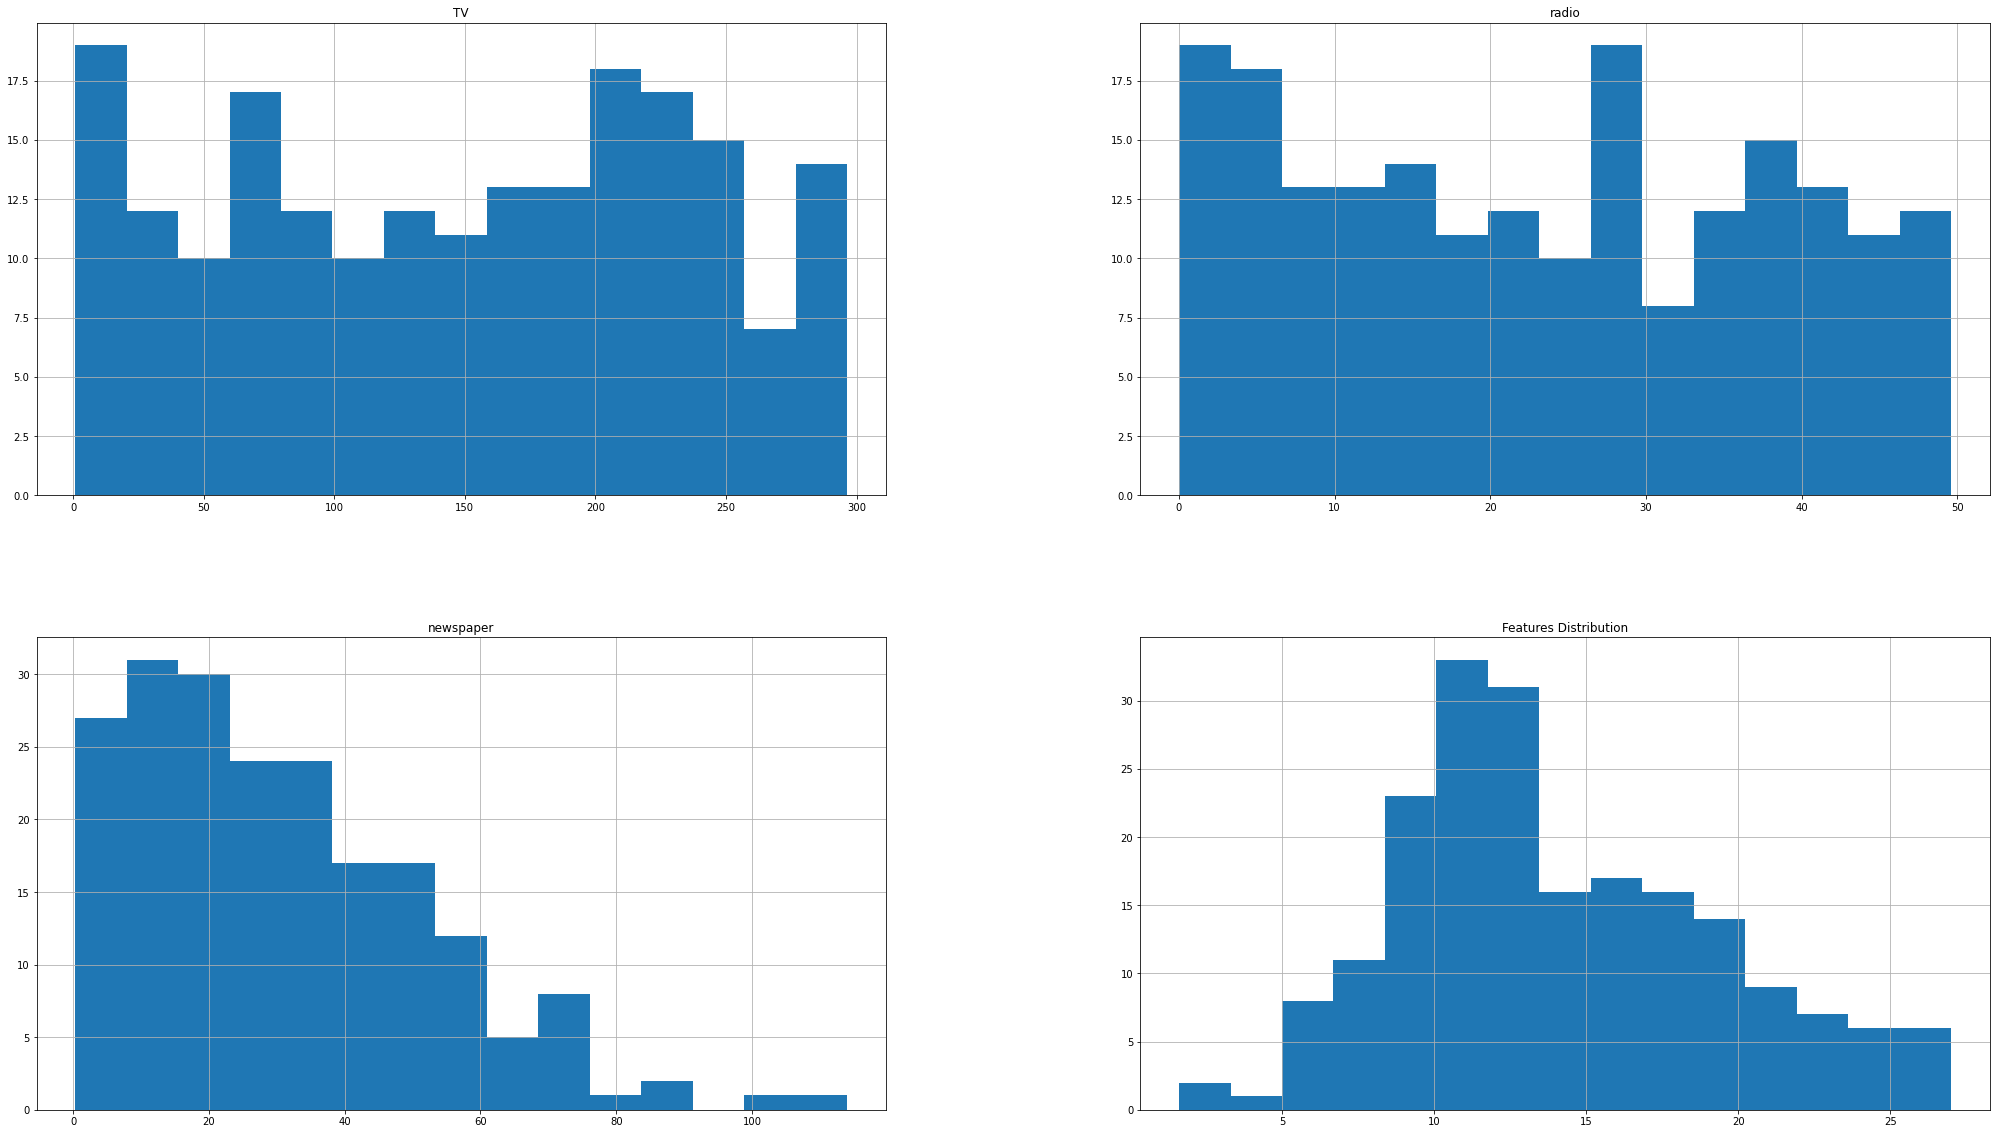

In [61]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


No outliers so not removing

In [62]:
# reducing skewness
x=df.drop(["sales"],axis=1)
x.skew()


TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [63]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

Skewness is reduced using the power transform

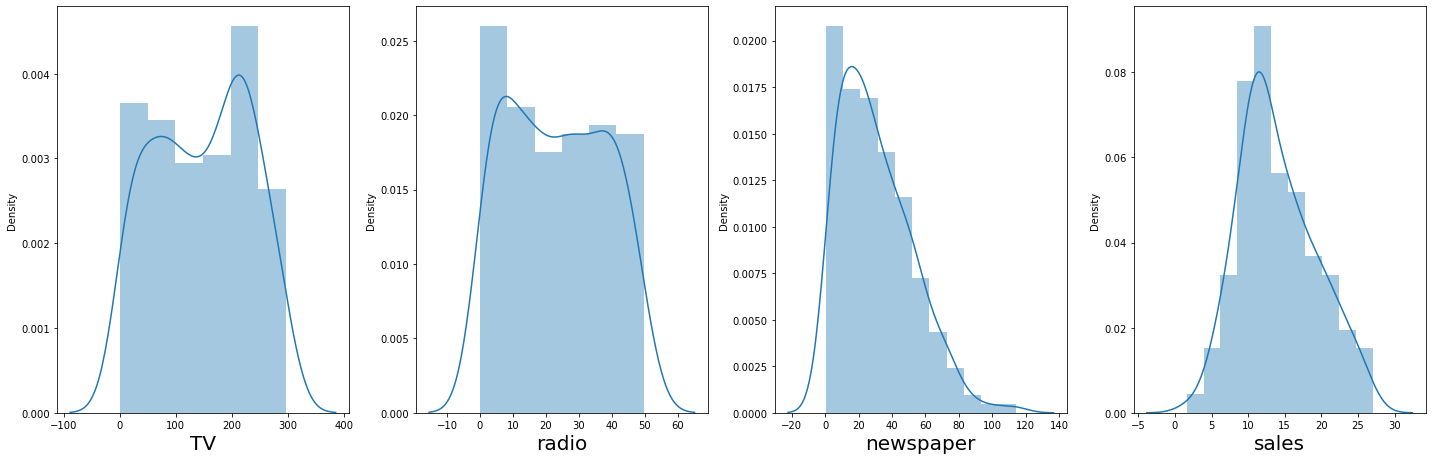

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(df[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [65]:
#vif
x=df.drop(columns=["sales"])
y=df['sales']

In [66]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


Multicollinearity much is not seen

In [67]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

Newspaper has little relationship with sales as compared to TV and radio

TV minimum starts at 0 and maximum is at 300. Its largest values lies in 150. The curve is normalised, showing it has high impact on Sales

Radio minimum starts at 0 and maximum upto 50

Newspaper minimum starts at 0 and maximum upto 95

# VISUALIZATION

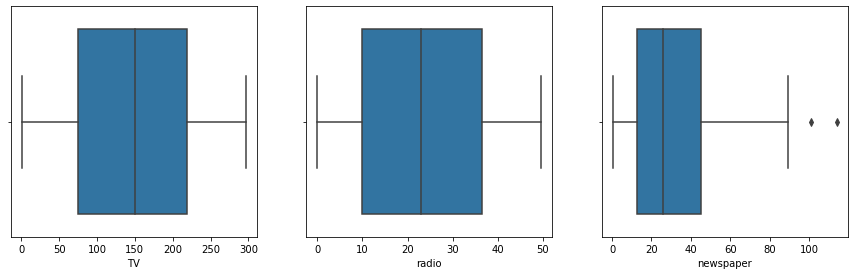

In [68]:
x=df.drop("sales",axis=1)
y=df["sales"]

plt.figure(figsize=(15,50))
graph=1

for column in x:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

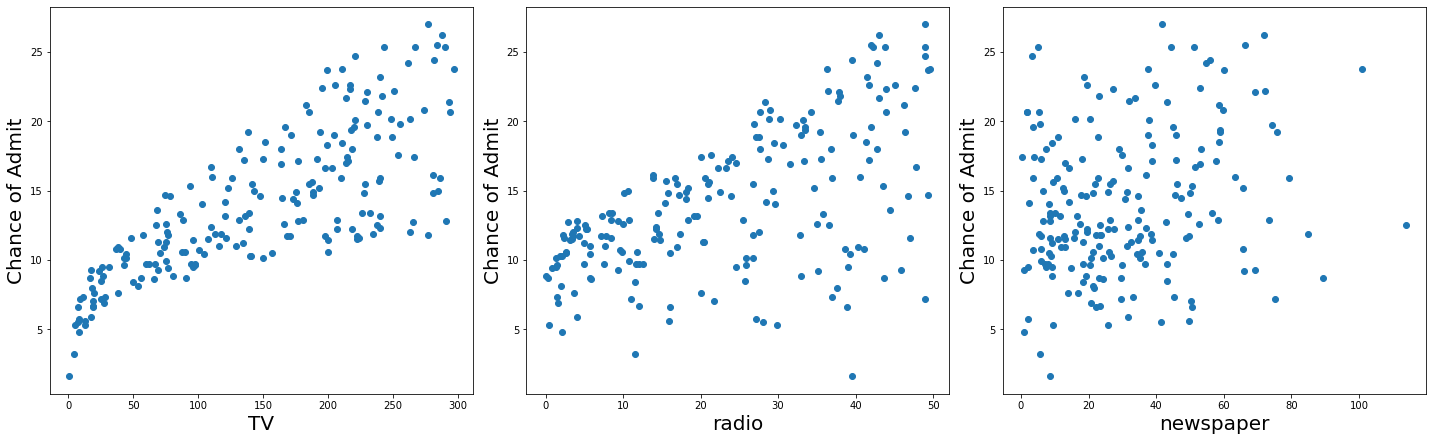

In [69]:
#visualising the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Feature Engineering

In [70]:
x=df.drop(columns=["sales"])
y=df['sales']

**1.Feature Scaling of input variable**

In [71]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head() # Displaying all the features after applying scaling technique to avoid bias output

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


Using the StandardScaler method to normalize the feature values and ensure that the regression model does not have any kind of biasness towards a particular column value

**2.Applying log transform on output variable**

<AxesSubplot:title={'center':'Normal Distribution'}, xlabel='sales', ylabel='Density'>

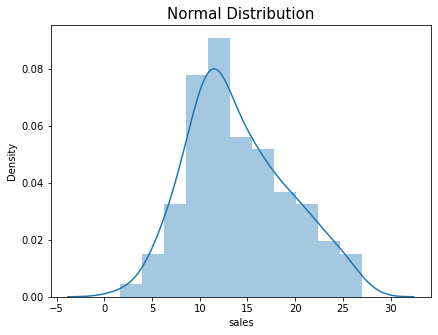

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)


The data is not skewed

**3.Splitting data into train, test and validation data**

**a.Finding the best random state**

In [73]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [74]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.8565135936400856 on Random State 199


We found best random_state value as 85% .We will create our train_test split using the random_state(199)

**b.splitting the data**

In [75]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=199)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [76]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(160, 3)
(160,)
(20, 3)
(20,)
(20, 3)
(20,)


(None, None)

**4.FEATURE IMPORTANCE**

,Importance
Features,
TV,0.628
radio,0.363
newspaper,0.008


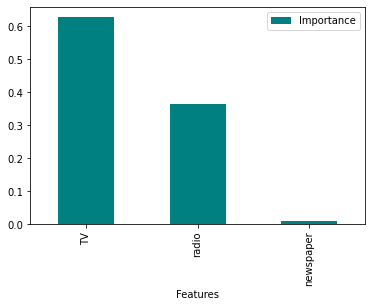

In [77]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

# Testing various models

**1.Training the model**

In [78]:
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
XGBR=XGBRegressor()
LGBR=LGBMRegressor()


models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('XGBRegressor',XGBR))
models.append(('LGBMRegressor',LGBR))

In [79]:
Model= []
score= []
cvs=[]
difference=[]
RMSE=[]


****************************************** LinearRegression ********************************************************


LinearRegression()


R2 Score is: 88.48000967602297


Cross Validation Score: 40.62021244180444


R2 Score - Cross Validation Score is 47.85979723421853
RMSE Score is: 1.3261064070912572


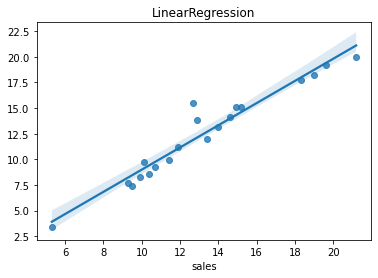

****************************************** Ridge Regressor ********************************************************


Ridge(alpha=0.01, normalize=True)


R2 Score is: 88.8944135547747


Cross Validation Score: 41.31318431541685


R2 Score - Cross Validation Score is 47.58122923935785
RMSE Score is: 1.3020362173251434


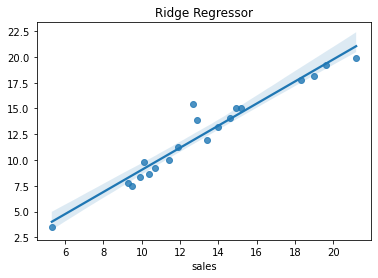

****************************************** Lasso Regressor ********************************************************


Lasso(alpha=0.01, max_iter=100000.0, normalize=True)


R2 Score is: 89.71496604905238


Cross Validation Score: 40.26139937264976


R2 Score - Cross Validation Score is 49.453566676402616
RMSE Score is: 1.2530118580666028


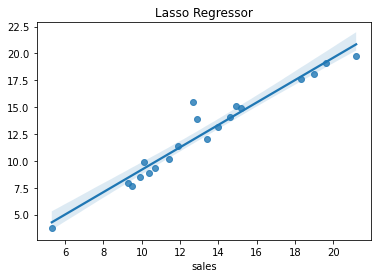

****************************************** SVR ********************************************************


SVR(epsilon=0.2, gamma='auto', kernel='poly')


R2 Score is: 68.60510909704378


Cross Validation Score: 22.498050106336773


R2 Score - Cross Validation Score is 46.107058990707
RMSE Score is: 2.1891816809680846


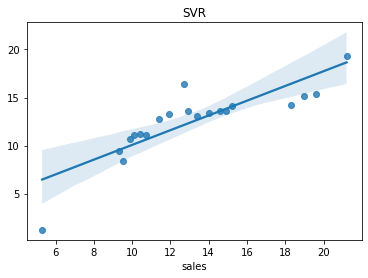

****************************************** DecisionTreeRegressor ********************************************************


DecisionTreeRegressor(criterion='poisson', random_state=111)


R2 Score is: 90.85833697722444


Cross Validation Score: -75.61023334191496


R2 Score - Cross Validation Score is 166.46857031913942
RMSE Score is: 1.1813128290169377


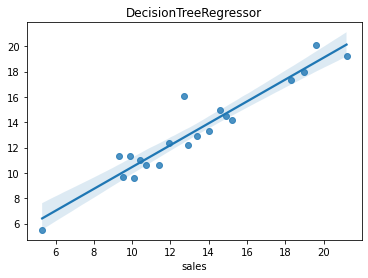

****************************************** RandomForestRegressor ********************************************************


RandomForestRegressor(max_depth=2, max_features='sqrt')


R2 Score is: 83.9622714411009


Cross Validation Score: 8.098517913135197


R2 Score - Cross Validation Score is 75.8637535279657
RMSE Score is: 1.5646735660416469


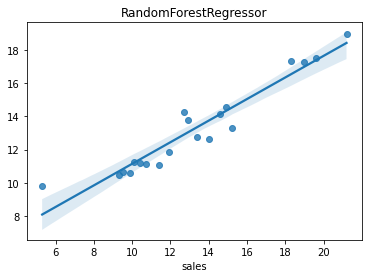

****************************************** KNeighborsRegressor ********************************************************


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)


R2 Score is: 95.52333646134772


Cross Validation Score: 23.791254603307994


R2 Score - Cross Validation Score is 71.73208185803973
RMSE Score is: 0.8266649865574321


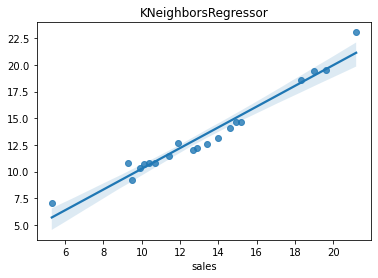

****************************************** GradientBoostingRegressor ********************************************************


GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200)


R2 Score is: 88.7147134963075


Cross Validation Score: -201.41013542878085


R2 Score - Cross Validation Score is 290.1248489250884
RMSE Score is: 1.3125281022997355


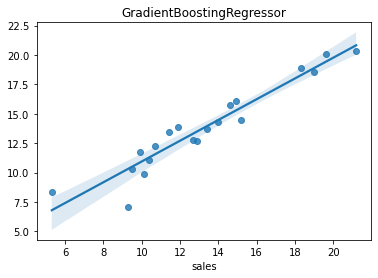

****************************************** AdaBoostRegressor ********************************************************


AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42)


R2 Score is: 95.50724432295766


Cross Validation Score: 3.8362756324677116


R2 Score - Cross Validation Score is 91.67096869048994
RMSE Score is: 0.8281494485771419


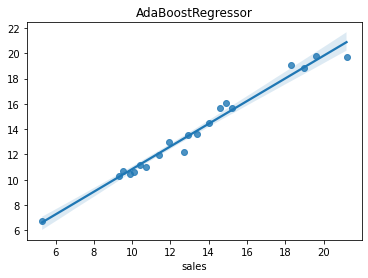

****************************************** ExtraTreesRegressor ********************************************************


ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6)


R2 Score is: 97.07906796941911


Cross Validation Score: 36.35842230096204


R2 Score - Cross Validation Score is 60.720645668457074
RMSE Score is: 0.6677486855331547


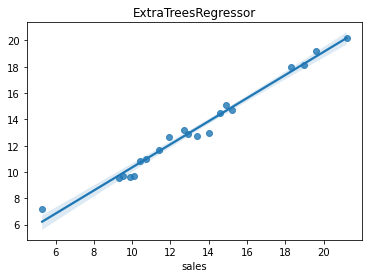

****************************************** XGBRegressor ********************************************************


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


R2 Score is: 96.12544732738473


Cross Validation Score: 34.399035304335136


R2 Score - Cross Validation Score is 61.7264120230496
RMSE Score is: 0.7690650950957091


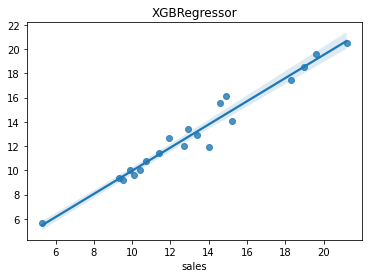

****************************************** LGBMRegressor ********************************************************


LGBMRegressor()


R2 Score is: 97.79676313741572


Cross Validation Score: -64.22333428943203


R2 Score - Cross Validation Score is 162.02009742684777
RMSE Score is: 0.5799397951295135


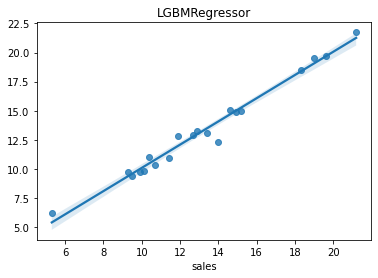

In [80]:
for name,model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
    # Training the model
    model.fit(X_train, Y_train) #computer learing
    
    print(model)
    
     # Predicting Y_test
    pred = model.predict(X_test)  #testing
    
    print('\n') 
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    score.append(r2)
    print('\n')
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,X_valid,Y_valid, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    
     # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
    #plots created
    sns.regplot(Y_test,pred)
    plt.title(name)
    plt.show()

In [81]:
result = pd.DataFrame({'Model': Model, 'r2score': score,'Cross_val_score': cvs,'RMSE score':RMSE,'Difference between cv score and cross_val score':difference})
result

,Model,r2score,Cross_val_score,RMSE score,Difference between cv score and cross_val score
0,LinearRegression,88.480010,40.620212,1.326106,47.859797
1,Ridge Regressor,88.894414,41.313184,1.302036,47.581229
2,Lasso Regressor,89.714966,40.261399,1.253012,49.453567
3,SVR,68.605109,22.498050,2.189182,46.107059
4,DecisionTreeRegressor,90.858337,-75.610233,1.181313,166.468570
5,RandomForestRegressor,83.962271,8.098518,1.564674,75.863754
6,KNeighborsRegressor,95.523336,23.791255,0.826665,71.732082
7,GradientBoostingRegressor,88.714713,-201.410135,1.312528,290.124849
8,AdaBoostRegressor,95.507244,3.836276,0.828149,91.670969
9,ExtraTreesRegressor,97.079068,36.358422,0.667749,60.720646


# Selection of best model

Some models with good r2 score and least difference between r2 score and cross val is :
1. LinearRegression
2. Ridge Regressor
3. Lasso Regressor	


Advantage of ridge over linear in current scenario where overfitting is seen , **ridge will actively work to reduce overfitting compared to linear regression** as can be seen in ridge's objective function

Ridge or lasso are **forms of regularized linear regressions**. The regularization can also be interpreted as prior in a maximum a posteriori estimation method:
Under this interpretation, the ridge and the lasso make different assumptions on the class of linear transformation they infer to relate input and output data. 

In the ridge, the coefficients of the linear transformation are normal distributed and in the lasso they are Laplace distributed. In the lasso, this makes it easier for the coefficients to be zero and therefore easier to eliminate some of your input variable as not contributing to the output.But since we have only 3 input Lasso is not prefered

Ridge is a type of linear regression but Ridge regression is best used when there is **multicollinearity problem or overfitting problem**

Advantage of lasso regression over ridge regression, is that it **produces simpler and more interpretable models that incorporate only a reduced set of the predictors.** But since our problem is simple only with 3 data, ridge regression would be the most prefered

Hence the best model will be the **Ridge regression model**

# Hyperparameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV 
parameters = {'alpha':[1,1e-2,3],
               'fit_intercept':['True', 'False'],
               'copy_X':['True', 'False'],
 }


GSCV = GridSearchCV(Ridge(), parameters, cv=5)
GSCV.fit(X_train, Y_train)
GSCV.best_params_

{'alpha': 0.01, 'copy_X': 'True', 'fit_intercept': 'True'}

In [83]:
Final_Model = Ridge(alpha= 0.01, copy_X=True, fit_intercept= True,normalize=True)
regressor = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)


R2 score for the Best Model is: 88.89441355477469


In [84]:
import joblib

#Saving the best Regression ML model
filename = "FinalModel_AdvertisementSalesprediction.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_AdvertisementSalesprediction.pkl']

# Predicting the test data with the model created and checking accuracy

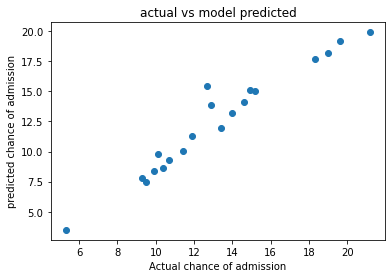

In [85]:
y_pred=regressor.predict(X_test)

plt.scatter(Y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

the scatter plot shows that the predicted and the test values are almost equal, proving this to be an efficient model

In [86]:
regressor_r2 = r2_score(Y_test,y_pred)*100
print("R2 score for the Model created is:", regressor)

R2 score for the Model created is: Ridge(alpha=0.01, normalize=True)


Prediction done and model stored as pickle file